In [17]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [18]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,320.0,325.0,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,75.0,80.0,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,55.0,60.0,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,45.0,50.0,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,80.0,85.0,14.355421


In [19]:
logqmax = np.log(datos[["Qmax"]])
logqmax.head()

,Qmax
0,2.847599
1,3.009655
2,3.423205
3,2.751324
4,2.827905


In [20]:
log_expl_var = pd.DataFrame(np.log(datos[["C_(mm_est", 'Lluvia_antecedent_48_horas_est']]))
log_expl_var.head()

,C_(mm_est,Lluvia_antecedent_48_horas_est
0,2.538447,2.595255
1,2.694627,3.916015
2,3.850148,3.916015
3,2.517696,0.000000
4,1.609438,3.927896


In [21]:
train_sizes = [10, 50, 70, 90, 100,103]

In [22]:
features = ['C_(mm_est', 'Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(),
X = log_expl_var[features],
y = logqmax[target], train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')

In [23]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.01549293 -0.00698306]
 [-0.02473747 -0.01333913]
 [-0.03018717 -0.01370928]
 [-0.02397827 -0.01264445]
 [-0.02285524 -0.01159926]
 [-0.02278825 -0.01319775]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.35160396 -0.34774857]
 [-0.18090687 -0.17045776]
 [-0.13921831 -0.18923477]
 [-0.14650898 -0.20316512]
 [-0.14800577 -0.20924415]
 [-0.1480976  -0.1811732 ]]


In [24]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10     0.011238
50     0.019038
70     0.021948
90     0.018311
100    0.017227
103    0.017993
dtype: float64

 --------------------

Mean validation scores

 10     0.349676
50     0.175682
70     0.164227
90     0.174837
100    0.178625
103    0.164635
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


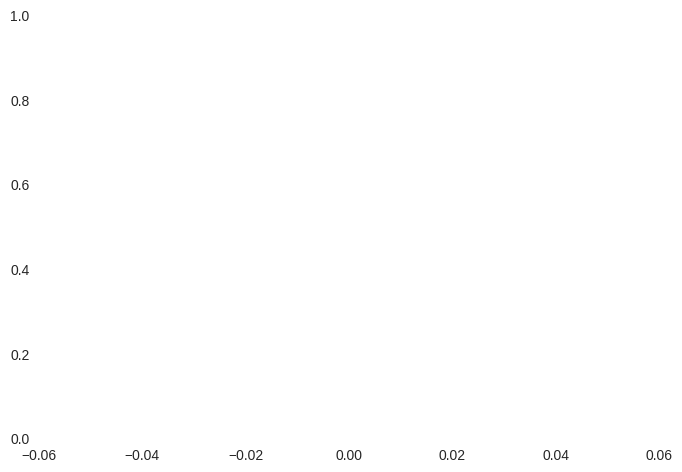

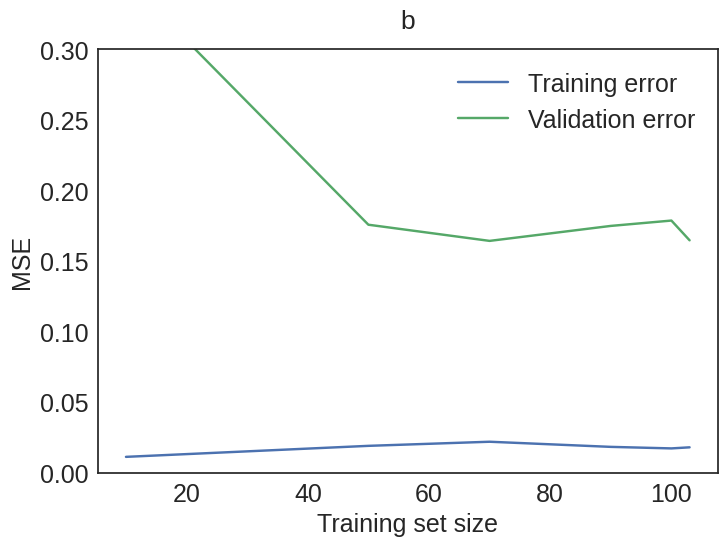

In [25]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('b', fontsize = 19, y = 1.03)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.ylim(0,0.3)
plt.savefig("Learning_curve_Random_ensemble2_.jpg", dpi = 500)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/en

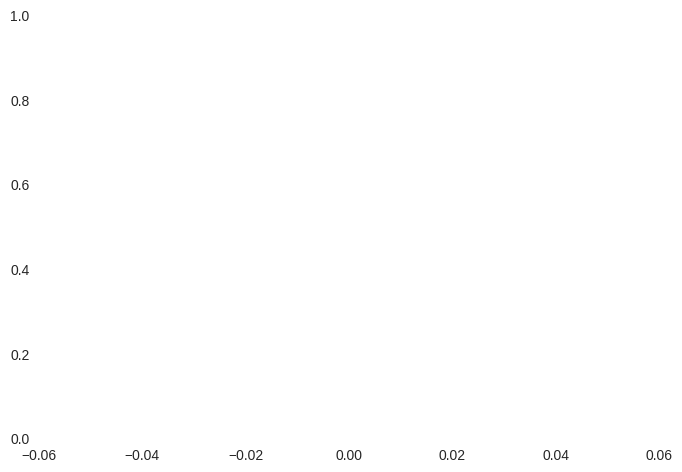

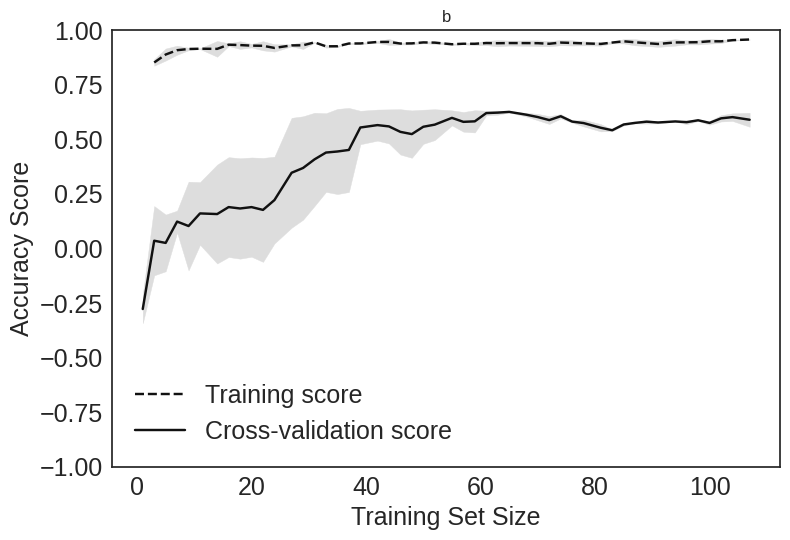

In [26]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), log_expl_var , logqmax,cv=2, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("b")
plt.xlabel("Training Set Size", fontsize =18), plt.ylabel("Accuracy Score", fontsize=18), plt.legend(loc="best", fontsize =18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.ylim(-1, 1)
plt.tight_layout()
plt.savefig("bias_variance_Random_f2_ensemble_.jpg", dpi = 500)

In [27]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = RandomForestRegressor()
results = cross_val_score(model, log_expl_var ,logqmax, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[0.67901572 0.71820161 0.74551074 0.71057564 0.76452668 0.73623183
 0.7739401  0.56810104 0.75051391 0.74918234 0.75243257 0.76575807
 0.73048171 0.66634525 0.78950334 0.60217386 0.7317534  0.78408198
 0.67551987 0.61314623 0.65894263 0.74362203 0.68967166 0.68838356
 0.81728258 0.76867584 0.71950582 0.73695788 0.62961793 0.64589762]
0.7135184479149668
0.05934345167544409


In [28]:
X_train,X_test, y_train,y_test = train_test_split(log_expl_var,logqmax, random_state=1)
lr=RandomForestRegressor()
lr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor()

In [29]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.9609706426115171
Test score: 0.7370382435183868


In [30]:
lc = learning_curve(RandomForestRegressor(),X_train,y_train,cv=2)
samples, train, test = lc[0], lc[1], lc[2]
lc

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

(array([ 8, 26, 44, 62, 80]),
 array([[0.83593192, 0.87964913],
        [0.89833556, 0.9429563 ],
        [0.95086075, 0.93776994],
        [0.96557329, 0.9523877 ],
        [0.96252452, 0.93711408]]),
 array([[0.2457981 , 0.48669869],
        [0.65499867, 0.64769129],
        [0.60086159, 0.66232675],
        [0.62871136, 0.70409707],
        [0.66105532, 0.74161717]]))

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


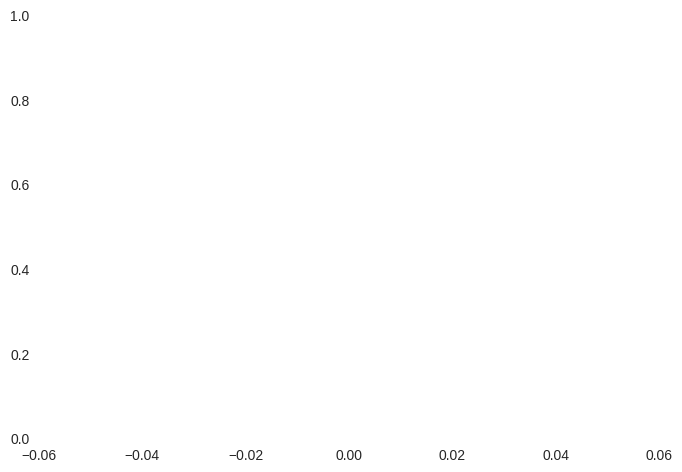

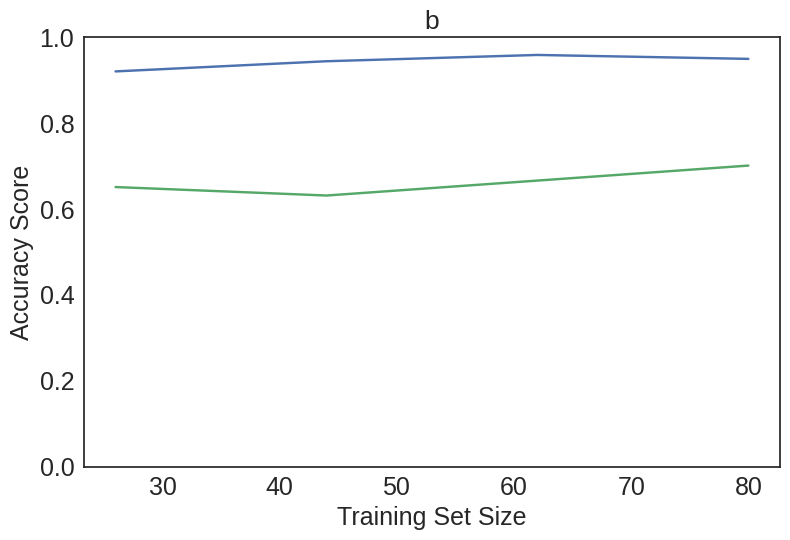

In [31]:
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);
plt.ylim(0,1)
plt.title("b", fontsize=19)
plt.xlabel("Training Set Size", fontsize=18), plt.ylabel("Accuracy Score", fontsize =18), plt.legend(loc="best", fontsize=18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.ylim(0,1)
plt.savefig("overfitting_Random_ensemble2_.jpg", dpi = 500)